<a href="https://colab.research.google.com/github/bipinKrishnan/ML_from_scratch/blob/master/neural_network_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the required libraries

In [1]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

### Download and prepare the data set

In [3]:
mnist = datasets.MNIST('./data', download=True)

threes = mnist.data[(mnist.targets == 3)]/255.0
sevens = mnist.data[(mnist.targets == 7)]/255.0

len(threes), len(sevens)

(6131, 6265)

### Check the indexed images

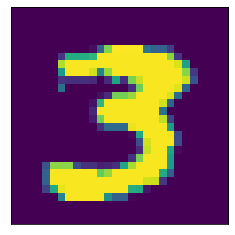

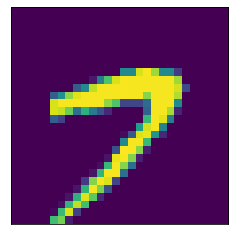

In [4]:
def show_image(img):
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()
  
show_image(threes[3])
show_image(sevens[8])

### Check the size of the tensor

In [5]:
print(threes.shape, sevens.shape)

torch.Size([6131, 28, 28]) torch.Size([6265, 28, 28])


### Combine the data set

In [6]:
combined_data = torch.cat([threes, sevens])
combined_data.shape

torch.Size([12396, 28, 28])

### Flatten the images

In [7]:
flat_imgs = combined_data.view((-1, 28*28))
flat_imgs.shape

torch.Size([12396, 784])

### Create ground truth labels

In [8]:
target = torch.tensor([1]*len(threes)+[2]*len(sevens))
target.shape

torch.Size([12396])

### Create the neural network

In [9]:
def sigmoid(x): return 1/(1+torch.exp(-x))

def simple_nn(data, weights, bias): return sigmoid((data@weights) + bias)

### Initialize the weights

In [10]:
w = torch.randn((flat_imgs.shape[1], 1), requires_grad=True)
b = torch.randn((1, 1), requires_grad=True)

### Define a loss

In [11]:
def error(pred, target): return ((pred-target)**2).mean()

### Update the weights and bias values

In [14]:
for i in range(6):
  pred = simple_nn(flat_imgs, w, b)
  loss = error(pred, target.unsqueeze(1))
  loss.backward()

  w.data -= 0.001*w.grad.data
  b.data -= 0.001*b.grad.data
  print("Loss: ", loss.item())

 
  w.grad.zero_()
  b.grad.zero_()

Loss:  0.8874070644378662
Loss:  0.8871631622314453
Loss:  0.8869196176528931
Loss:  0.8866763114929199
Loss:  0.8864330649375916
Loss:  0.8861901164054871


### Misc

In [19]:
import numpy as np
import pandas as pd

##### Display a sample from mnist data set

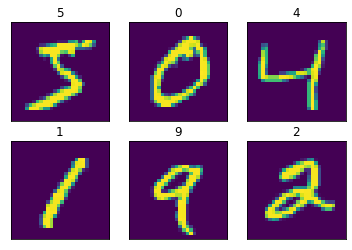

In [17]:
def sample_mnist(row, col):
  for i in range(row*col):
    plt.subplot(row, col, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(mnist[i][1])
    plt.imshow(np.array(mnist[i][0]))

  plt.show()

sample_mnist(2, 3)

#### How does computer see the image

In [36]:
def rep_pixels(idx):
  df = pd.DataFrame(np.array(mnist[idx][0]))
  print("\tPixel representation for the digit: {}\n".format(mnist[idx][1]))
  return df.style.set_properties(**{'font-size': '10pt'}).background_gradient('Greys')

rep_pixels(50)

	Pixel representation for the digit: 3



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,12,56,140,126,175,200,96,2,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,35,166,238,254,246,242,253,246,254,67,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,184,182,146,127,70,30,45,36,215,175,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,207,246,14,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,251,169,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,215,232,20,0,0,0,0,0,0,0,0,0,0


______________________
# <center>Sigmoid function<center>
______________________

<center><img src='https://lh3.googleusercontent.com/proxy/xtPYbihsNQXYMdumzyQX0FYOQVAGSjTqp4Io8vc7Rc6FYqXeSkzoQyTSRGOXIVxFMjbZ3EOAbe77TYRL9ZXnyw3C-oOZxZuVtykJnLlSvK6VREe4LejVJo3POq8c'><center>

$$y(x) = \frac{1}{1 + e^{-x}}$$ 

